# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

#### **1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
prevrenda = pd.read_csv('Previsao_de_renda.csv')
prevrenda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
prevrenda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
prev_renda = prevrenda[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']].dropna()
prev_renda

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


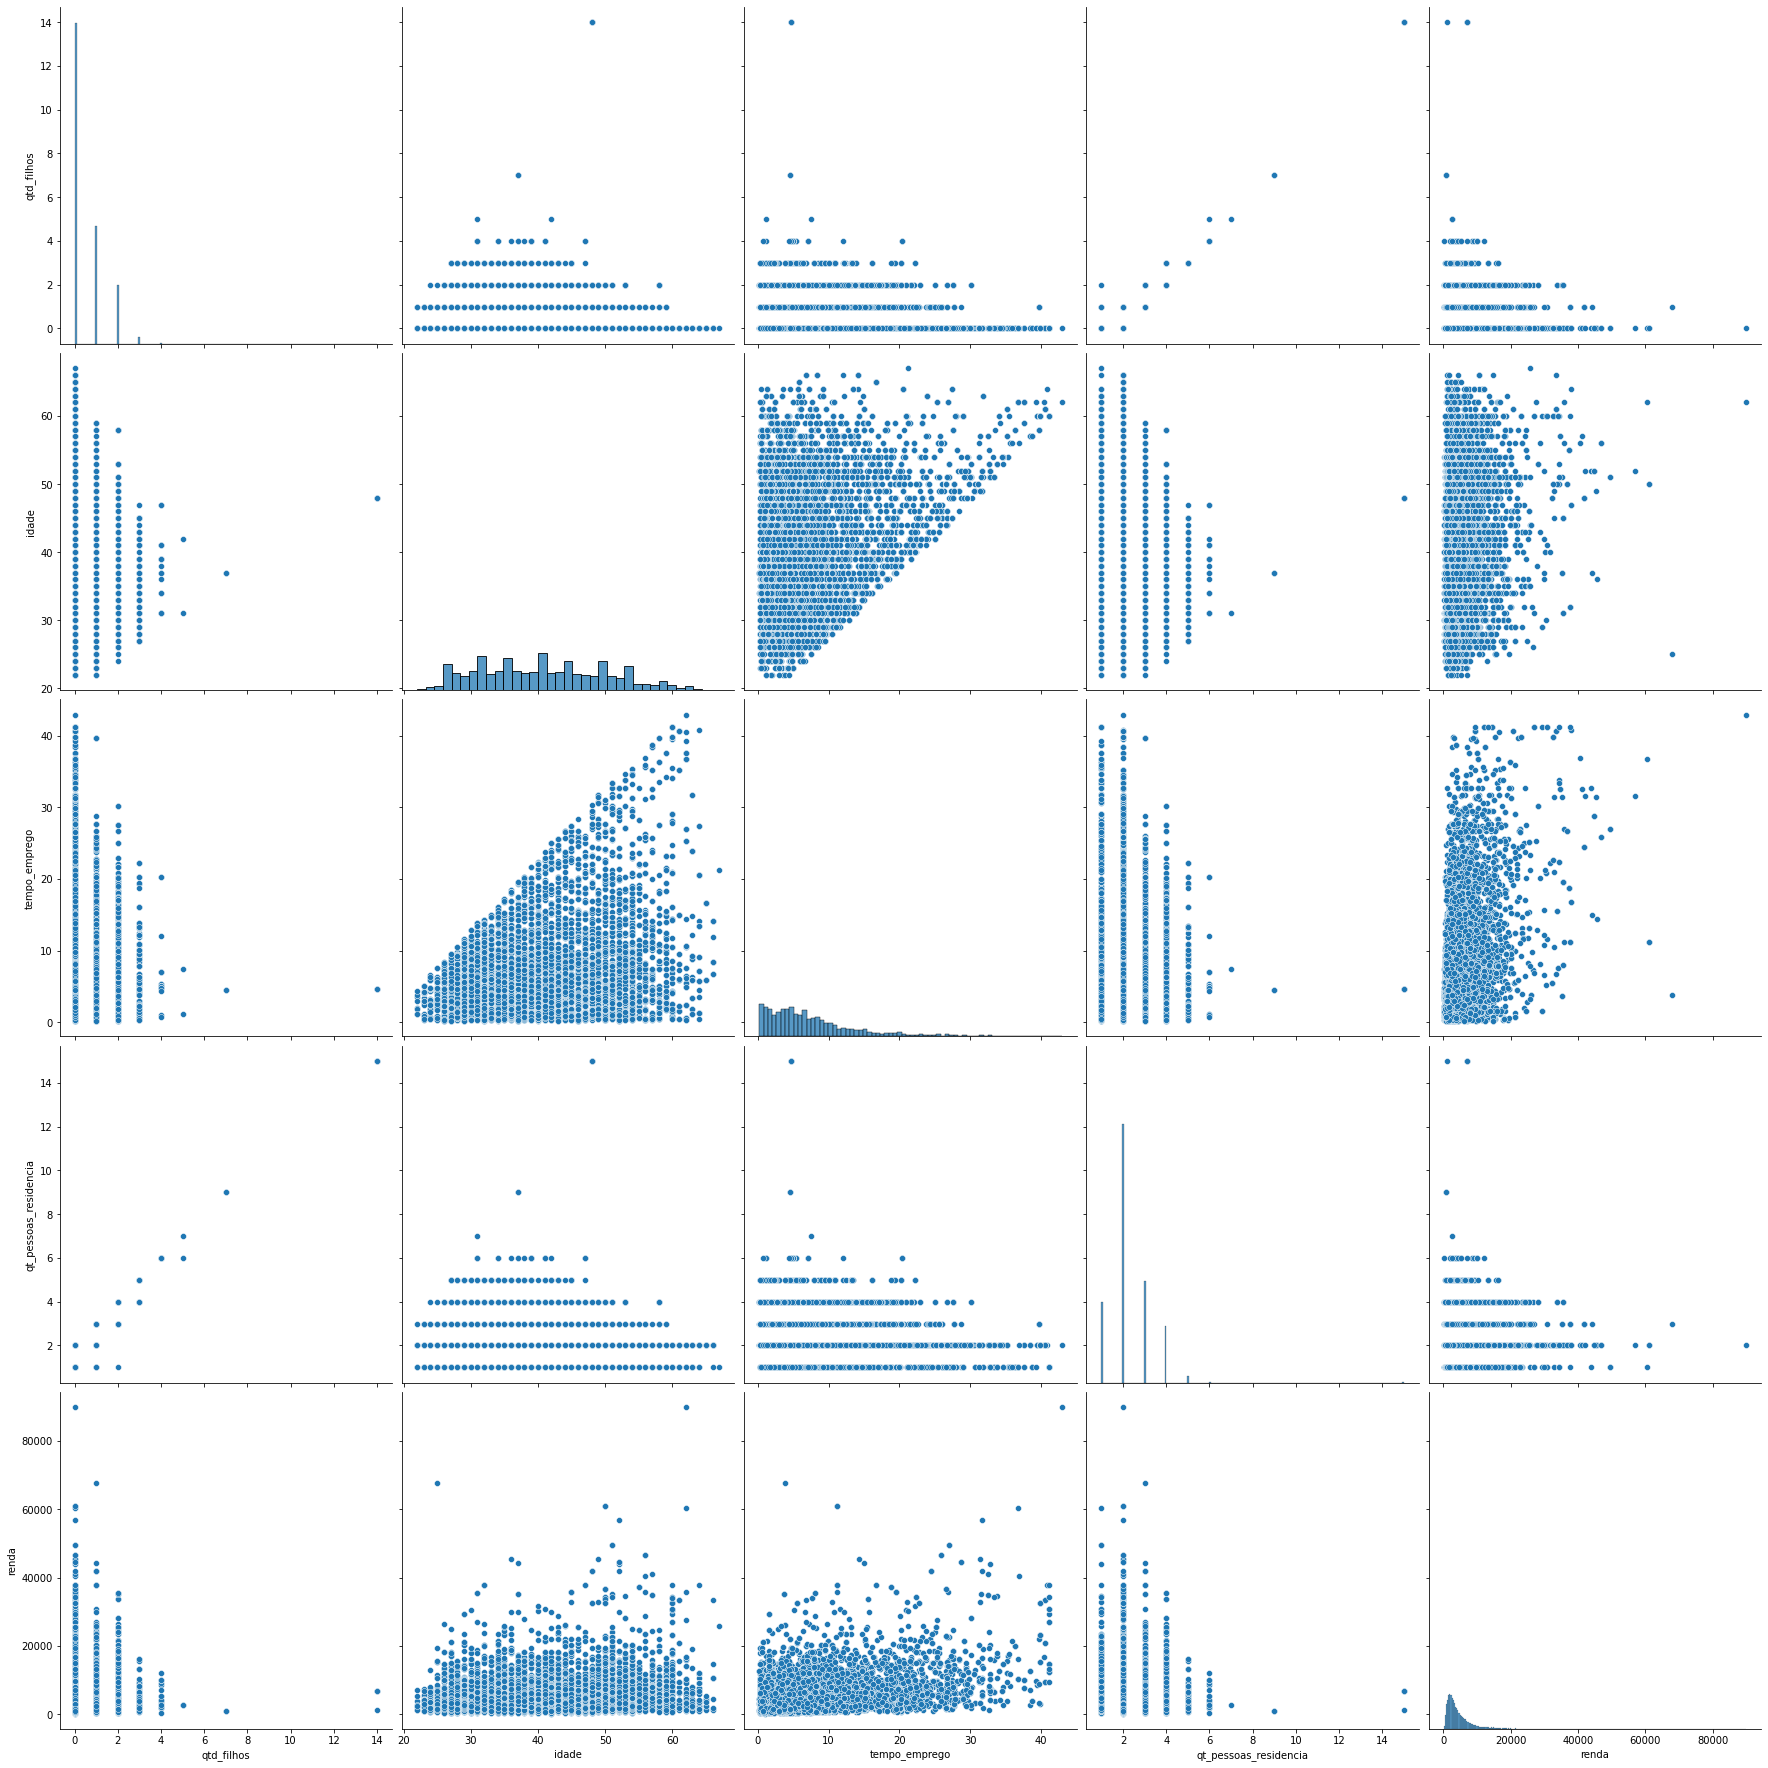

In [103]:
sns.pairplot(data = prev_renda, height=5, corner=False)

#### **2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.**

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


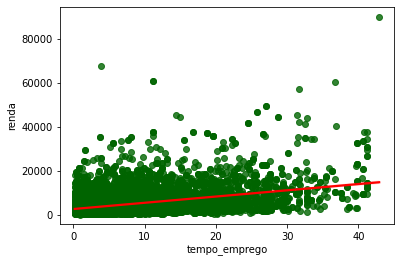

In [136]:
x = prevrenda['tempo_emprego']
y = prevrenda['renda']
prevrenda1 = pd.DataFrame({'tempo_emprego':x, 'renda':y})

_ = sns.regplot(x='tempo_emprego', y='renda', data = prevrenda1, scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"})
prevrenda1.corr()

,idade,renda
idade,1.00000,0.04257
renda,0.04257,1.00000


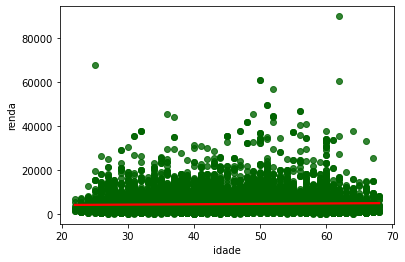

In [137]:
x = prevrenda['idade']
y = prevrenda['renda']
prevrenda2 = pd.DataFrame({'idade':x, 'renda':y})

_ = sns.regplot(x='idade', y='renda', data = prevrenda2, scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"})
prevrenda2.corr()

#### **3) Na sua opinião, há outliers na variável renda?**

Na tabela "idade x renda" o valor aparece muito baixo na segunda (0,04257) e na primeira um pouco maior (0,394235), dando a entender que exista outliers, e apesar de muitos pontos estarem concentrados próximo a reta vermelha, existem alguns pontos que "descentralizam", essa reta, assim acredito que exista outliers, tanto no primeiro gráfico, quanto no segundo gráfico. 

#### **4) Calcule o logaritmo da variável renda e repita a sequência de análise.**

,tempo_emprego,renda,log_y
tempo_emprego,1.000000,0.394235,0.379556
renda,0.394235,1.000000,0.835734
log_y,0.379556,0.835734,1.000000


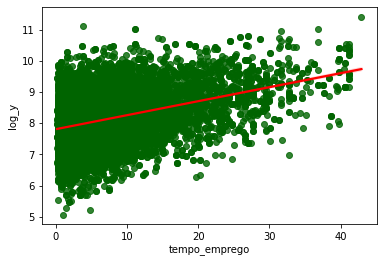

In [138]:
prevrenda1_log = prevrenda1.copy()
prevrenda1_log['log_y'] = np.log(prevrenda1_log['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y', data = prevrenda1_log, scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"})

prevrenda1_log.corr()

,idade,renda,log_y
idade,1.000000,0.042570,0.024712
renda,0.042570,1.000000,0.835734
log_y,0.024712,0.835734,1.000000


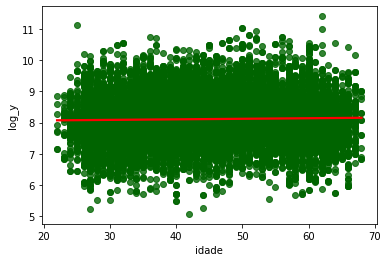

In [139]:
prevrenda2_log = prevrenda2.copy()
prevrenda2_log['log_y'] = np.log(prevrenda2_log['renda'])

_ = sns.regplot(x='idade', y='log_y', data = prevrenda2_log, scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"})

prevrenda2_log.corr()

#### **5) A aplicação do LOG você acha que melhorou ou piorou a análise?**

Acredito que apesar de uma melhora no visual do gráfico, mais simétrico, os valores da tabela "idade x log_y", pioraram, na primeira (0,024712) e na segunda (0.379556).